In [52]:
print("Session started")

Session started


In [53]:
# Step 1: Import Necessary Libraries
import numpy as np
import pandas as pd
import os
import cv2
import matplotlib.pyplot as plt
import tensorflow as tf
import keras

from sklearn.model_selection import train_test_split
#from tensorflow.keras import layers, Model
#from tensorflow.keras.models import Sequential
#from tensorflow.keras.layers import Conv2D, MaxPooling2D, Flatten, Dense, Dropout, Input
from keras.applications.vgg16 import VGG16, preprocess_input, decode_predictions
from keras.preprocessing import image
from sklearn.model_selection import train_test_split


import pickle
print("Sucessfully imported all the libraries")

Sucessfully imported all the libraries


In [54]:
# Data Augmentations
def fliplr(image):
    image = cv2.flip(image, 1)
    return image

def flipud(image):
    image = cv2.flip(image, 0)
    return image

def fliplu(image):
    image = cv2.flip(image, -1)
    return image

def rotate30(image):
    height, width = image.shape[:2]
    angle = 30
    rotation_matrix = cv2.getRotationMatrix2D((width / 2, height / 2), angle, 1)
    rotated_image = cv2.warpAffine(image, rotation_matrix, (width, height))
    return image

def rotate_30(image):
    height, width = image.shape[:2]
    angle = -30
    rotation_matrix = cv2.getRotationMatrix2D((width / 2, height / 2), angle, 1)
    rotated_image = cv2.warpAffine(image, rotation_matrix, (width, height))
    return image

def rotate45(image):
    height, width = image.shape[:2]
    angle = 45
    rotation_matrix = cv2.getRotationMatrix2D((width / 2, height / 2), angle, 1)
    rotated_image = cv2.warpAffine(image, rotation_matrix, (width, height))
    return image

def rotate_45(image):
    height, width = image.shape[:2]
    angle = -45
    rotation_matrix = cv2.getRotationMatrix2D((width / 2, height / 2), angle, 1)
    rotated_image = cv2.warpAffine(image, rotation_matrix, (width, height))
    return image

def rotate15(image):
    height, width = image.shape[:2]
    angle = 15
    rotation_matrix = cv2.getRotationMatrix2D((width / 2, height / 2), angle, 1)
    rotated_image = cv2.warpAffine(image, rotation_matrix, (width, height))
    return image

def rotate_15(image):
    height, width = image.shape[:2]
    angle = -15
    rotation_matrix = cv2.getRotationMatrix2D((width / 2, height / 2), angle, 1)
    rotated_image = cv2.warpAffine(image, rotation_matrix, (width, height))
    return image

In [55]:
def scaleRadius(img, scale):
    x = img[img.shape[0] // 2, :, :].sum(1)
    r = (x > x.mean() / 10).sum() / 2
    s = scale * 1.0 / r
    return cv2.resize(img, (0, 0), fx=s, fy=s)

scale = 400

In [56]:
# Initialize lists to store images and labels
images = []
labels = []

In [57]:

df_train = pd.read_csv('/home/vijay/project/data/train.csv', header=None, skiprows=1)
df_test = pd.read_csv('/home/vijay/project/data/val.csv', header=None, skiprows=1)
# Define target wridth and height for image resizing
target_width, target_height = 448, 448  # Adjust as needed
input_shape = (448, 448, 3)
number_of_classes = 5

In [58]:
# Define a function to load and preprocess images
def load_and_preprocess_image(image_path):
    img = cv2.imread(image_path)
    if img is None:
        print(f'Error loading image: {image_path}')
        return None
    print(f'Original image dimensions: {img.shape}')
    img = cv2.resize(img, (target_width, target_height))
    img = img.astype('float32') / 255  # Normalize pixel values
    return img

In [59]:
print("Reading files!")

Reading files!


In [60]:
for index , row in df_train.iterrows():
    image_id = row[0]
    label = row[1]
    form = '.png'
    if label==0 or label==1:
        image_path = os.path.join(r"/home/vijay/project/data/train/", f'{image_id+form}')
        image1 = load_and_preprocess_image(image_path)
        print(label)
        if image1 is None:
            continue
        images.append(image1)
        labels.append(label)

        if label == 1:
          # fliplr
          image2 = fliplr(image1)
          images.append(image2)
          labels.append(label)
          
          # flipud
          image3 = flipud(image1)
          images.append(image3)
          labels.append(label)


print(len(images))


Original image dimensions: (1736, 2416, 3)
1
Original image dimensions: (1050, 1050, 3)
0
Original image dimensions: (1536, 2048, 3)
0
Original image dimensions: (1958, 2588, 3)
0
Original image dimensions: (1736, 2416, 3)
1
Original image dimensions: (1050, 1050, 3)
0
Original image dimensions: (1050, 1050, 3)
0
Original image dimensions: (2136, 3216, 3)
1
Original image dimensions: (1050, 1050, 3)
0
Original image dimensions: (614, 819, 3)
0
Original image dimensions: (1536, 2048, 3)
0
Original image dimensions: (1050, 1050, 3)
0
Original image dimensions: (1736, 2416, 3)
1
Original image dimensions: (614, 819, 3)
0
Original image dimensions: (1958, 2588, 3)
0
Original image dimensions: (1050, 1050, 3)
0
Original image dimensions: (1536, 2048, 3)
0
Original image dimensions: (1958, 2588, 3)
0
Original image dimensions: (1050, 1050, 3)
0
Original image dimensions: (1958, 2588, 3)
0
Original image dimensions: (1050, 1050, 3)
0
Original image dimensions: (1050, 1050, 3)
0
Original image

In [61]:
for index , row in df_test.iterrows():
    image_id = row[0]
    label = row[1]
    form = '.png'
    if label==0 or label==1:
        image_path = os.path.join(r"/home/vijay/project/data/val/", f'{image_id+form}')
        image1 = load_and_preprocess_image(image_path)
        print(label)
        if image1 is None:
            continue
        images.append(image1)
        labels.append(label)

        if label == 1:
          # fliplr
          image2 = fliplr(image1)
          images.append(image2)
          labels.append(label)

          # flipud
          image3 = flipud(image1)
          images.append(image3)
          labels.append(label)


Original image dimensions: (480, 640, 3)
0
Original image dimensions: (480, 640, 3)
0
Original image dimensions: (480, 640, 3)
0
Original image dimensions: (480, 640, 3)
0
Original image dimensions: (480, 640, 3)
0
Original image dimensions: (480, 640, 3)
0
Original image dimensions: (1736, 2416, 3)
0
Original image dimensions: (1050, 1050, 3)
0
Original image dimensions: (480, 640, 3)
0
Original image dimensions: (480, 640, 3)
0
Original image dimensions: (1736, 2416, 3)
0
Original image dimensions: (480, 640, 3)
0
Original image dimensions: (480, 640, 3)
0
Original image dimensions: (480, 640, 3)
0
Original image dimensions: (1736, 2416, 3)
0
Original image dimensions: (1958, 2588, 3)
0
Original image dimensions: (480, 640, 3)
0
Original image dimensions: (480, 640, 3)
0
Original image dimensions: (480, 640, 3)
0
Original image dimensions: (1050, 1050, 3)
0
Original image dimensions: (480, 640, 3)
0
Original image dimensions: (480, 640, 3)
0
Original image dimensions: (480, 640, 3)
0

Read Messidor 2

In [62]:

df1 = pd.read_excel(r'/home/vijay/project/data/messidor2/Annotation_Base21.xls', header=None, skiprows=1)
df2 = pd.read_excel(r'/home/vijay/project/data/messidor2/Annotation_Base22.xls', header=None, skiprows=1)
df3 = pd.read_excel(r'/home/vijay/project/data/messidor2/Annotation_Base23.xls', header=None, skiprows=1)
df4 = pd.read_excel(r'/home/vijay/project/data/messidor2/Annotation_Base24.xls', header=None, skiprows=1)
# Define target wridth and height for image resizing
target_width, target_height = 448, 448  # Adjust as needed
input_shape = (448, 448, 3)
number_of_classes = 2

In [63]:
for index , row in df1.iterrows():
    image_id = row[0]
    label = row[2]
    if label==0 or label==1:
        image_path = os.path.join(r"/home/vijay/project/data/messidor2/images", f'{image_id}')
        image1 = load_and_preprocess_image(image_path)
        print(label)
        if image1 is None:
            continue
        images.append(image1)
        labels.append(label)
        if label == 1:
            # fliplr
            image2 = fliplr(image1)
            images.append(image2)
            labels.append(label)
            # flipudi
            image3 = flipud(image1)
            images.append(image3)
            labels.append(label)

Original image dimensions: (960, 1440, 3)
0
Original image dimensions: (960, 1440, 3)
0
Original image dimensions: (960, 1440, 3)
0
Original image dimensions: (960, 1440, 3)
0
Original image dimensions: (960, 1440, 3)
0
Original image dimensions: (960, 1440, 3)
0
Original image dimensions: (960, 1440, 3)
0
Original image dimensions: (960, 1440, 3)
0
Original image dimensions: (960, 1440, 3)
0
Original image dimensions: (960, 1440, 3)
0
Original image dimensions: (960, 1440, 3)
0
Original image dimensions: (960, 1440, 3)
0
Original image dimensions: (960, 1440, 3)
0
Original image dimensions: (960, 1440, 3)
1
Original image dimensions: (960, 1440, 3)
1
Original image dimensions: (960, 1440, 3)
0
Original image dimensions: (960, 1440, 3)
0
Original image dimensions: (960, 1440, 3)
0
Original image dimensions: (960, 1440, 3)
0
Original image dimensions: (960, 1440, 3)
0
Original image dimensions: (960, 1440, 3)
0
Original image dimensions: (960, 1440, 3)
1
Original image dimensions: (960,

In [64]:
for index , row in df2.iterrows():
    image_id = row[0]
    label = row[2]
    if label==0 or label==1:
        image_path = os.path.join(r"/home/vijay/project/data/messidor2/images", f'{image_id}')
        image1 = load_and_preprocess_image(image_path)
        print(label)
        if image1 is None:
            continue
        images.append(image1)
        labels.append(label)
        if label == 1:
            # fliplr
            image2 = fliplr(image1)
            images.append(image2)
            labels.append(label)
            # flipud
        image3 = flipud(image1)
        images.append(image3)
        labels.append(label)


Original image dimensions: (960, 1440, 3)
0
Original image dimensions: (960, 1440, 3)
0
Original image dimensions: (960, 1440, 3)
0
Original image dimensions: (960, 1440, 3)
0
Original image dimensions: (960, 1440, 3)
0
Original image dimensions: (960, 1440, 3)
0
Original image dimensions: (960, 1440, 3)
0
Original image dimensions: (960, 1440, 3)
0
Original image dimensions: (960, 1440, 3)
0
Original image dimensions: (960, 1440, 3)
1
Original image dimensions: (960, 1440, 3)
0
Original image dimensions: (960, 1440, 3)
0
Original image dimensions: (960, 1440, 3)
0
Original image dimensions: (960, 1440, 3)
0
Original image dimensions: (960, 1440, 3)
0
Original image dimensions: (960, 1440, 3)
0
Original image dimensions: (960, 1440, 3)
0
Original image dimensions: (960, 1440, 3)
0
Original image dimensions: (960, 1440, 3)
0
Original image dimensions: (960, 1440, 3)
0
Original image dimensions: (960, 1440, 3)
0
Original image dimensions: (960, 1440, 3)
0
Original image dimensions: (960,

In [65]:
for index , row in df3.iterrows():
    image_id = row[0]
    label = row[2]
    if label==0 or label==1:
        image_path = os.path.join(r"/home/vijay/project/data/messidor2/images", f'{image_id}')
        image1 = load_and_preprocess_image(image_path)
        print(label)
        if image1 is None:
            continue
        images.append(image1)
        labels.append(label)
        if label == 1:
            # fliplr
            image2 = fliplr(image1)
            images.append(image2)
            labels.append(label)
            # flipud
            image3 = flipud(image1)
            images.append(image3)
            labels.append(label)

Original image dimensions: (960, 1440, 3)
1
Original image dimensions: (960, 1440, 3)
1
Original image dimensions: (960, 1440, 3)
1
Original image dimensions: (960, 1440, 3)
0
Original image dimensions: (960, 1440, 3)
1
Original image dimensions: (960, 1440, 3)
0
Original image dimensions: (960, 1440, 3)
0
Original image dimensions: (960, 1440, 3)
0
Original image dimensions: (960, 1440, 3)
0
Original image dimensions: (960, 1440, 3)
0
Original image dimensions: (960, 1440, 3)
0
Original image dimensions: (960, 1440, 3)
0
Original image dimensions: (960, 1440, 3)
1
Original image dimensions: (960, 1440, 3)
1
Original image dimensions: (960, 1440, 3)
0
Original image dimensions: (960, 1440, 3)
0
Original image dimensions: (960, 1440, 3)
0
Original image dimensions: (960, 1440, 3)
0
Original image dimensions: (960, 1440, 3)
1
Original image dimensions: (960, 1440, 3)
1
Original image dimensions: (960, 1440, 3)
1
Original image dimensions: (960, 1440, 3)
1
Original image dimensions: (960,

In [66]:
for index , row in df4.iterrows():
    image_id = row[0]
    label = row[2]
    if label==0 or label==1:
        image_path = os.path.join(r"/home/vijay/project/data/messidor2/images", f'{image_id}')
        image1 = load_and_preprocess_image(image_path)
        print(label)
        if image1 is None:
            continue
        images.append(image1)
        labels.append(label)
        if label == 1:
            # fliplr
            image2 = fliplr(image1)
            images.append(image2)
            labels.append(label)
            # flipud
            image3 = flipud(image1)
            images.append(image3)
            labels.append(label)

Original image dimensions: (960, 1440, 3)
0
Original image dimensions: (960, 1440, 3)
1
Original image dimensions: (960, 1440, 3)
0
Original image dimensions: (960, 1440, 3)
1
Original image dimensions: (960, 1440, 3)
1
Original image dimensions: (960, 1440, 3)
1
Original image dimensions: (960, 1440, 3)
1
Original image dimensions: (960, 1440, 3)
1
Original image dimensions: (960, 1440, 3)
0
Original image dimensions: (960, 1440, 3)
0
Original image dimensions: (960, 1440, 3)
0
Original image dimensions: (960, 1440, 3)
0
Original image dimensions: (960, 1440, 3)
0
Original image dimensions: (960, 1440, 3)
0
Original image dimensions: (960, 1440, 3)
1
Original image dimensions: (960, 1440, 3)
0
Original image dimensions: (960, 1440, 3)
1
Original image dimensions: (960, 1440, 3)
1
Original image dimensions: (960, 1440, 3)
0
Original image dimensions: (960, 1440, 3)
1
Original image dimensions: (960, 1440, 3)
0
Original image dimensions: (960, 1440, 3)
0
Original image dimensions: (960,

In [67]:
# Split data into training and testing sets
x_train, x_test, y_train, y_test = train_test_split(images, labels, test_size=0.3, random_state=42)

# convert list into array
x_train = np.array(x_train)
x_test = np.array(x_test)

# checking input shape
#x_train = np.expand_dims(x_train, -1)
#x_test = np.expand_dims(x_test, -1)
print("x_train shape:", x_train.shape)
print(x_train.shape[0], "train samples")
print(x_test.shape[0], "test samples")

# convert class vectors to binary class matrices
y_train = keras.utils.to_categorical(y_train, 2)
y_test = keras.utils.to_categorical(y_test, 2)

x_train shape: (3713, 448, 448, 3)
3713 train samples
1592 test samples


In [68]:

print("x_train shape:", x_train.shape)
print("x_test shape:", x_test.shape)
print("y_train shape:", y_train.shape)
print("y_test shape:", y_test.shape)
print(y_train.shape[0], "train samples")
print(y_test.shape[0], "test samples")

x_train shape: (3713, 448, 448, 3)
x_test shape: (1592, 448, 448, 3)
y_train shape: (3713, 2)
y_test shape: (1592, 2)
3713 train samples
1592 test samples


In [69]:
model = tf.keras.models.Sequential([
    # This is the first convolution
    tf.keras.layers.Conv2D(64, (12,12), activation='relu', input_shape=(448,448,3)),
    tf.keras.layers.MaxPooling2D(2, 2),
    # The second convolution
    tf.keras.layers.Conv2D(128, (6,6), activation='relu'),
    tf.keras.layers.MaxPooling2D(2,2),
    # The third convolution
    tf.keras.layers.Conv2D(256, (3,3), activation='relu'),
    tf.keras.layers.MaxPooling2D(2,2),
    # The fourth convolution
    #tf.keras.layers.Conv2D(512, (3,3), activation='relu'),
    #tf.keras.layers.MaxPooling2D(2,2),
    # Flatten the results to feed into a DNN
    tf.keras.layers.Flatten(),
    # 512 neuron hidden layer
    tf.keras.layers.Dense(128, activation='relu'),
    tf.keras.layers.Dropout(0.4),
    tf.keras.layers.Dense(2, activation='softmax')
])
model.summary()

/home/vijay/miniconda3/envs/myenv/lib/python3.10/site-packages/keras/src/layers/convolutional/base_conv.py:107: UserWarning: Do not pass an `input_shape`/`input_dim` argument to a layer. When using Sequential models, prefer using an `Input(shape)` object as the first layer in the model instead.
  super().__init__(activity_regularizer=activity_regularizer, **kwargs)


Model: "sequential_1"

┏━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━┳━━━━━━━━━━━━━━━━━━━━━━━━┳━━━━━━━━━━━━━━━┓
┃ Layer (type)                    ┃ Output Shape           ┃       Param # ┃
┡━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━╇━━━━━━━━━━━━━━━━━━━━━━━━╇━━━━━━━━━━━━━━━┩
│ conv2d_3 (Conv2D)               │ (None, 437, 437, 64)   │        27,712 │
├─────────────────────────────────┼────────────────────────┼───────────────┤
│ max_pooling2d_3 (MaxPooling2D)  │ (None, 218, 218, 64)   │             0 │
├─────────────────────────────────┼────────────────────────┼───────────────┤
│ conv2d_4 (Conv2D)               │ (None, 213, 213, 128)  │       295,040 │
├─────────────────────────────────┼────────────────────────┼───────────────┤
│ max_pooling2d_4 (MaxPooling2D)  │ (None, 106, 106, 128)  │             0 │
├─────────────────────────────────┼────────────────────────┼───────────────┤
│ conv2d_5 (Conv2D)               │ (None, 104, 104, 256)  │       295,168 │
├─────────────────────────────────┼────────────────────────┼───────────────┤
│ max_pooling2d_5 (MaxPooling2D)  │ (None, 52, 52, 256)    │             0 │
├─────────────────────────────────┼────────────────────────┼───────────────┤
│ flatten_1 (Flatten)             │ (None, 692224)         │             0 │
├─────────────────────────────────┼────────────────────────┼───────────────┤
│ dense_2 (Dense)                 │ (None, 128)            │    88,604,800 │
├─────────────────────────────────┼────────────────────────┼───────────────┤
│ dropout_1 (Dropout)             │ (None, 128)            │             0 │
├─────────────────────────────────┼────────────────────────┼───────────────┤
│ dense_3 (Dense)                 │ (None, 2)              │           258 │
└─────────────────────────────────┴────────────────────────┴───────────────┘

 Total params: 89,222,978 (340.36 MB)

 Trainable params: 89,222,978 (340.36 MB)

 Non-trainable params: 0 (0.00 B)

In [70]:
print("Session started")

Session started


In [71]:
from keras.callbacks import ModelCheckpoint

In [72]:
checkpoint = ModelCheckpoint("/home/vijay/project/models/best_model.keras", monitor='val_accuracy', verbose=1,
    save_best_only=True, mode='max', save_freq="epoch")

In [73]:
optim = keras.optimizers.RMSprop(learning_rate = 0.0001)
model.compile(optimizer=optim, loss='binary_crossentropy', metrics=['accuracy'])

In [74]:
model.fit(x_train, y_train, epochs=50, batch_size=32, validation_data=(x_test, y_test), callbacks=[checkpoint])

2024-05-29 20:30:44.448521: W external/local_tsl/tsl/framework/cpu_allocator_impl.cc:83] Allocation of 8942567424 exceeds 10% of free system memory.
2024-05-29 20:30:54.078101: W external/local_tsl/tsl/framework/cpu_allocator_impl.cc:83] Allocation of 8942567424 exceeds 10% of free system memory.


Epoch 1/50
117/117 ━━━━━━━━━━━━━━━━━━━━ 0s 232ms/step - accuracy: 0.7543 - loss: 0.5139

2024-05-29 20:31:47.472734: E external/local_xla/xla/service/slow_operation_alarm.cc:65] Trying algorithm eng0{} for conv (f32[24,64,437,437]{3,2,1,0}, u8[0]{0}) custom-call(f32[24,3,448,448]{3,2,1,0}, f32[64,3,12,12]{3,2,1,0}, f32[64]{0}), window={size=12x12}, dim_labels=bf01_oi01->bf01, custom_call_target="__cudnn$convBiasActivationForward", backend_config={"operation_queue_id":"0","wait_on_operation_queues":[],"cudnn_conv_backend_config":{"activation_mode":"kRelu","conv_result_scale":1,"side_input_scale":0,"leakyrelu_alpha":0}} is taking a while...
2024-05-29 20:31:48.731134: E external/local_xla/xla/service/slow_operation_alarm.cc:133] The operation took 2.258555026s
Trying algorithm eng0{} for conv (f32[24,64,437,437]{3,2,1,0}, u8[0]{0}) custom-call(f32[24,3,448,448]{3,2,1,0}, f32[64,3,12,12]{3,2,1,0}, f32[64]{0}), window={size=12x12}, dim_labels=bf01_oi01->bf01, custom_call_target="__cudnn$convBiasActivationForward", backend_config={"operation_queue_id":"0","wait_on_operation_que


Epoch 1: val_accuracy improved from -inf to 0.82726, saving model to /home/vijay/project/models/best_model.keras
117/117 ━━━━━━━━━━━━━━━━━━━━ 59s 472ms/step - accuracy: 0.7547 - loss: 0.5131 - val_accuracy: 0.8273 - val_loss: 0.3485
Epoch 2/50
116/117 ━━━━━━━━━━━━━━━━━━━━ 0s 174ms/step - accuracy: 0.8725 - loss: 0.3019
Epoch 2: val_accuracy improved from 0.82726 to 0.89510, saving model to /home/vijay/project/models/best_model.keras
117/117 ━━━━━━━━━━━━━━━━━━━━ 27s 232ms/step - accuracy: 0.8725 - loss: 0.3016 - val_accuracy: 0.8951 - val_loss: 0.2455
Epoch 3/50
116/117 ━━━━━━━━━━━━━━━━━━━━ 0s 174ms/step - accuracy: 0.8779 - loss: 0.2556
Epoch 3: val_accuracy improved from 0.89510 to 0.89573, saving model to /home/vijay/project/models/best_model.keras
117/117 ━━━━━━━━━━━━━━━━━━━━ 27s 232ms/step - accuracy: 0.8781 - loss: 0.2553 - val_accuracy: 0.8957 - val_loss: 0.1957
Epoch 4/50
116/117 ━━━━━━━━━━━━━━━━━━━━ 0s 175ms/step - accuracy: 0.8890 - loss: 0.2240
Epoch 4: val_accuracy improved

In [75]:
from keras.models import load_model

best_model = load_model(r'/home/vijay/project/models/best_model.keras')

# Save the best model for future use
best_model.save('/home/vijay/project/models/best_mildnorm.h5')
best_model.save('/home/vijay/project/models/best_mildnorm.hdf5')
best_model.save('/home/vijay/project/models/best_mildnorm.keras')

In [76]:
predictions = best_model.predict(x_test)

50/50 ━━━━━━━━━━━━━━━━━━━━ 4s 62ms/step


In [77]:
binary_predictions = (predictions > 0.5).astype(int)

In [78]:
from sklearn.metrics import accuracy_score

# Calculate accuracy
accuracy = accuracy_score(y_test, binary_predictions)

# Print accuracy
print(f"Accuracy on test data: {accuracy:.4f}")


Accuracy on test data: 0.9296


In [79]:
score = best_model.evaluate(x_test, y_test, verbose=0)
print("Test loss:", score[0])
print("Test accuracy:", score[1])

Test loss: 0.15417446196079254
Test accuracy: 0.929648220539093


In [80]:
score = best_model.evaluate(x_train, y_train, verbose=0)
print("Train loss:", score[0])
print("Train accuracy:", score[1])

2024-05-29 20:50:50.481880: W external/local_tsl/tsl/framework/cpu_allocator_impl.cc:83] Allocation of 8942567424 exceeds 10% of free system memory.
2024-05-29 20:50:59.652167: W external/local_tsl/tsl/framework/cpu_allocator_impl.cc:83] Allocation of 8942567424 exceeds 10% of free system memory.


Train loss: 0.14755569398403168
Train accuracy: 0.9294371008872986


In [81]:
y_pred = model.predict(x_test)


50/50 ━━━━━━━━━━━━━━━━━━━━ 3s 59ms/step


In [82]:
from sklearn.metrics import confusion_matrix

cm = confusion_matrix(y_test.argmax(axis=1), y_pred.argmax(axis=1))


In [83]:
sensitivity = cm[1, 1] / (cm[1, 0] + cm[1, 1])
specificity = cm[0, 0] / (cm[0, 0] + cm[0, 1])


In [84]:
from sklearn.metrics import roc_curve

fpr, tpr, thresholds = roc_curve(y_test.ravel(), y_pred.ravel())


In [85]:
from sklearn.metrics import roc_auc_score

auc = roc_auc_score(y_test.ravel(), y_pred.ravel())


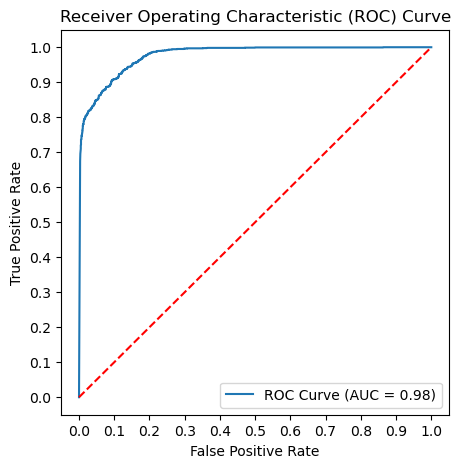

In [86]:
plt.figure(figsize=(5,5))
plt.plot(fpr, tpr, label=f'ROC Curve (AUC = {auc:.2f})')
plt.plot([0, 1], [0, 1], color='red', linestyle='--')
plt.xlabel('False Positive Rate')
plt.ylabel('True Positive Rate')
plt.title('Receiver Operating Characteristic (ROC) Curve')
plt.xticks(np.arange(0, 1.1, step=0.1))
plt.yticks(np.arange(0, 1.1, step=0.1))
plt.legend()
plt.show()


In [87]:
import numpy as np
import matplotlib.pyplot as plt
from sklearn.metrics import confusion_matrix

def calculate_specificity_sensitivity(y_true, y_pred):
    cm = confusion_matrix(y_true, y_pred)
    tn, fp, fn, tp = cm.ravel()

    specificity = tn / (tn + fp)
    sensitivity = tp / (tp + fn)

    return specificity, sensitivity

y_test_single = np.argmax(y_test, axis=1)
y_pred_single = np.argmax(y_pred, axis=1)

specificity, sensitivity = calculate_specificity_sensitivity(y_test_single, y_pred_single)
print("Specificity:", specificity)
print("Sensitivity:", sensitivity)

Specificity: 0.9216512215669755
Sensitivity: 0.8567901234567902


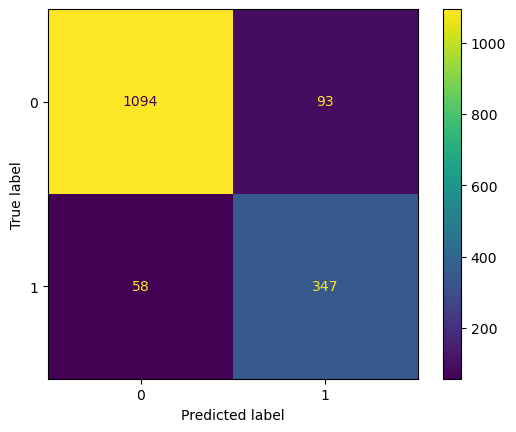

In [88]:
from sklearn import metrics

confusion_matrix = metrics.confusion_matrix(y_test_single, y_pred_single)

cm_display = metrics.ConfusionMatrixDisplay(confusion_matrix = confusion_matrix, display_labels = [0, 1])

cm_display.plot()
plt.show()

In [89]:
score = model.evaluate(x_test, y_test, verbose=0)
print("Test loss:", score[0])
print("Test accuracy:", score[1])

Test loss: 0.2826553285121918
Test accuracy: 0.9051507711410522


In [90]:
y_pred = model.predict(x_test)

50/50 ━━━━━━━━━━━━━━━━━━━━ 3s 53ms/step


In [91]:
from sklearn.metrics import roc_curve
from sklearn.metrics import roc_auc_score
from sklearn.metrics import confusion_matrix

In [92]:
cm = confusion_matrix(y_test.argmax(axis=1), y_pred.argmax(axis=1))
sensitivity = cm[1, 1] / (cm[1, 0] + cm[1, 1])
specificity = cm[0, 0] / (cm[0, 0] + cm[0, 1])
auc = roc_auc_score(y_test.ravel(), y_pred.ravel())
fpr, tpr, thresholds = roc_curve(y_test.ravel(), y_pred.ravel())

In [93]:
import matplotlib.pyplot as plt

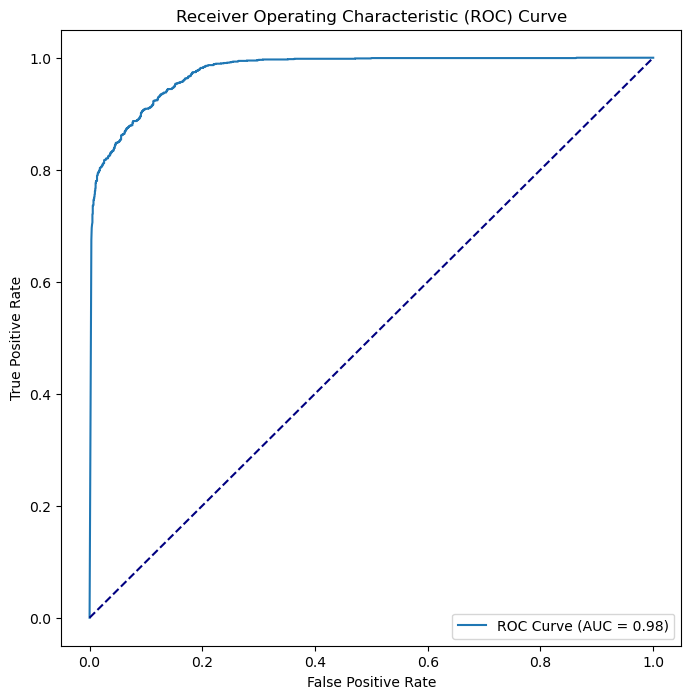

In [94]:
plt.figure(figsize=(8, 8))
plt.plot(fpr, tpr, label=f'ROC Curve (AUC = {auc:.2f})')
plt.plot([0, 1], [0, 1], color='navy', linestyle='--')
plt.xlabel('False Positive Rate')
plt.ylabel('True Positive Rate')
plt.title('Receiver Operating Characteristic (ROC) Curve')
plt.legend()
plt.show()